In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import uniform, norm

---
# Tarea 5 Estadística 2020-02
---
* Diego Andrés Gómez Polo
* Daniel Alzate
---


# 1

In [110]:
np.random.seed(0)
N = 15000
f = lambda x,y: np.exp(-1 * x**2 * y**3)
sampling = lambda n: uniform.rvs(size=n)
simulations = []
realValue = 0.928885
delta = 0.01

for i in range(1000):
    [X_i, Y_i, Z_i] = [sampling(N) for _ in range(3)]
    func = f(X_i, Y_i)
    W = np.less_equal(Z_i, func).astype(int)
    stimator = np.mean(W)
    simulations.append(stimator)

simulations = np.array(simulations)
simulations_mean = np.mean(simulations)
error = 1 - ((realValue - delta  < simulations) & (simulations < realValue + delta)).sum() / len(simulations)
error*=100
print(f'Intervalo = ({realValue - delta},{realValue + delta})')
print(f'{round(error, 4)}% fuera del intervalo definido')
print(f'Media de las simulaciones: {simulations_mean}')

Intervalo = (0.918885,0.938885)
0.0% fuera del intervalo definido
Media de las simulaciones: 0.9289721333333334


## Graph

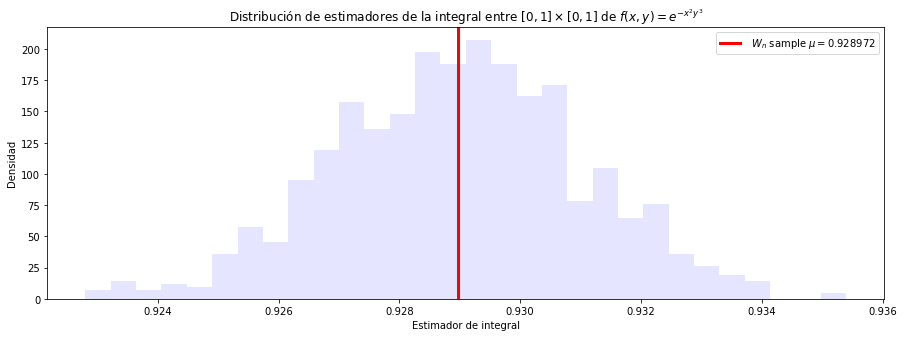

In [113]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(simulations, 30, alpha=0.1, density=True, color='b')
plt.axvline(x=simulations_mean, color='r', lw=3, label= f' $W_n$ sample $\mu = {round(simulations_mean, 6)}$')
plt.xlabel("Estimador de integral")
plt.ylabel("Densidad")
plt.title('Distribución de estimadores de la integral entre $[0,1]\\times[0,1]$ de $f(x,y)= e^{-x^2 y^3}$')
plt.legend()
plt.show()

# 3.b

In [3]:
np.random.seed(0)
N = 1000
mu1, sigma1 = 5, 1
mu2, sigma2 = 3, math.sqrt(2)
sampling = lambda n, mu, sigma: norm.rvs(loc=mu, scale=sigma, size=n)
muestraX, muestraY = sampling(N, mu1, sigma1), sampling(N, mu2, sigma2)

# 3.c

In [5]:
N_Bootstrap = 10000
estimadores = []
estimadores.append(mu1-mu2)

for i in range(N_Bootstrap):
    resampling_X = np.random.choice(muestraX, size=N, replace=True)
    resampling_Y = np.random.choice(muestraY, size=N, replace=True)
    resample_mu1 = np.mean(resampling_X)
    resample_mu2 = np.mean(resampling_Y)
    stimator = resample_mu1 - resample_mu2
    estimadores.append(stimator)


## Graph 3.d

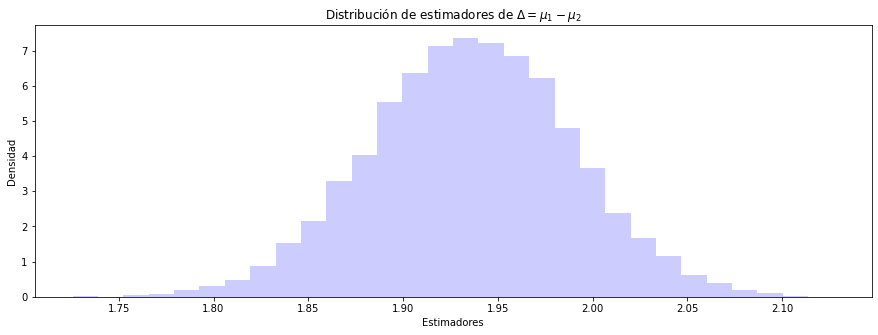

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
plt.hist(estimadores, 30, alpha=0.2, density=True, color='b')
plt.xlabel("Estimadores")
plt.ylabel("Densidad")
plt.title('Distribución de estimadores de $\Delta = \mu_1 - \mu_2$')
plt.show()

## 3.e

In [23]:
alpha1, alpha2, alpha3 = 0.1, 0.5, 0.01

def confidence_interval(arr, alpha):
    lower = np.percentile(arr, 100*(alpha/2), interpolation='linear')
    upper = np.percentile(arr, 100*(1-alpha/2), interpolation='linear')
    return (lower, upper)

CI1 = confidence_interval(estimadores, alpha1)
CI2 = confidence_interval(estimadores, alpha2)
CI3 = confidence_interval(estimadores, alpha3)

print(f'El intervalo de confianza para alpha = 0.1 es: {CI1}')
print(f'El intervalo de confianza para alpha = 0.5 es: {CI2}')
print(f'El intervalo de confianza para alpha = 0.01 es: {CI3}')

El intervalo de confianza para alpha = 0.1 es: (1.8476916948086952, 2.023302668895244)
El intervalo de confianza para alpha = 0.5 es: (1.8999632862840263, 1.9716422209790245)
El intervalo de confianza para alpha = 0.01 es: (1.796117550078666, 2.0709571058112304)
